# Crop Recommendation System — Model Evaluation & Hyperparameter Tuning

In this notebook, we'll evaluate the trained model using test data, visualize results, and perform **hyperparameter tuning** to improve accuracy.

## Import Required Libraries

In this step, we import all the necessary Python libraries used for:

- Data handling  
- Model loading and saving  
- Model evaluation  
- Hyperparameter tuning  
- Visualization

These include:

- `pandas` for dataframes  
- `pickle` for loading/saving ML models  
- `sklearn` functions for accuracy, classification metrics, tuning  
- `matplotlib` and `seaborn` for plots

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Load Test Data and Trained Model

We now load:

- `X_test.csv` → Test features  
- `y_test.csv` → True labels  
- Previously trained model → `crop_model.pkl`

These files were saved in earlier notebooks.

Once loaded successfully, we are ready to evaluate the model using unseen test data.

In [2]:
x_test=pd.read_csv('../data/X_test.csv')
y_test=pd.read_csv('../data/Y_test.csv')

with open ('../Models/crop_model.pkl',"rb") as f:
    model=pickle.load(f)

print('Model has been loaded successfully')

Model has been loaded successfully


## Model Evaluation

We use the test dataset to predict using the trained model.

After generating predictions:

- `accuracy_score` shows how many predictions were correct  
- `classification_report` provides precision, recall, F1 score for each crop category

These metrics help us understand:

- How well the model performs overall  
- Which crops are predicted correctly  
- Which crops are getting misclassified

In [4]:
# Step 3: Model evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 99.55%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00 

## Confusion Matrix Visualization

A Confusion Matrix is a visual table showing:

- True crop labels (actual)
- Predicted crop labels (model output)

It helps identify:

- Correct predictions (diagonal cells)
- Misclassifications (off–diagonal cells)

We plot the confusion matrix using:

- `confusion_matrix()` from sklearn  
- `heatmap()` from seaborn

This gives a clear visual understanding of model performance category-by-category.

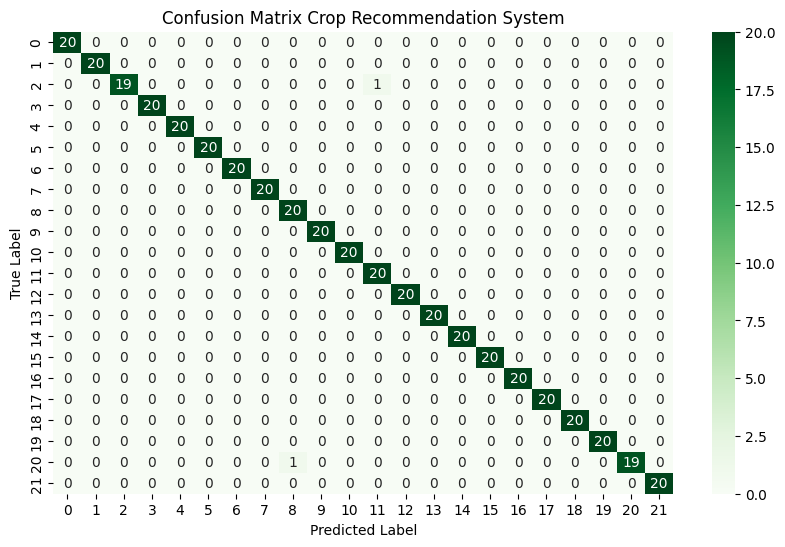

In [5]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix Crop Recommendation System')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  Hyperparameter Tuning (GridSearchCV)

Hyperparameter tuning improves model performance by finding the best configuration of parameters using grid search.

We define a search grid including:

- `n_estimators` → Number of trees  
- `max_depth` → Maximum tree depth  
- `min_samples_split` → Minimum samples required to split a node

`GridSearchCV` tests all combinations using cross-validation and selects the best settings.

This process helps improve model accuracy and generalization.

In [15]:
# Step 5: Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

grid_search.fit(x_test, y_test.values.ravel())

print("Best Parameters Found:")
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters Found:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [18]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)
tuned_acc=accuracy_score(y_test,y_pred)
print(f'Tunned Model Accurancy: {tuned_acc*100:.2f}%\n')
print('Tunned Model Report:')
print(classification_report(y_test,y_pred))

Tunned Model Accurancy: 100.00%

Tunned Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00    

## Save Tuned Model

Once tuning is complete, we save the improved model:

- Stored as `crop_model_tuned.pkl`
- Can be reused later in deployment or prediction notebooks

This ensures we always use the best available model going forward.

In [19]:
# Step 7: Save the Tuned Model
with open('../models/crop_model_tuned.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Tuned model saved as crop_model_tuned.pkl")

Tuned model saved as crop_model_tuned.pkl
